# Introduction à Pandas

Pandas c'est une bibliothèque de traitement et d'analyse de données. C'est *Microsoft Excel* en Python.



In [2]:
import pandas as pd
import numpy as np

## Série

Une série est un tableau à une dimension. C'est l'équivalent d'une colonne dans une feuille de calcul Excel.

À la différence d'une liste numpy, une série peut avoir des étiquettes d'index. Ces étiquettes peuvent être des chaînes de caractères, des dates, etc. Le type de données d'une série peut être hétérogène (entiers, flottants, chaînes de caractères, etc.). Une série est un objet de la classe `pandas.Series`.

- C'est un tableau unidimensionnel
- Il peut contenir des données de types différents
- Il a un index (étiquette)
- Il est mutable (modifiable)
- Il est optimisé pour la vitesse

In [6]:
s = pd.Series([1, 2, 3, 4, 5])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [9]:
s.__class__.__mro__

(pandas.core.series.Series,
 pandas.core.base.IndexOpsMixin,
 pandas.core.arraylike.OpsMixin,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 object)

## Index

L'index est une étiquette qui identifie chaque élément d'une série. Il peut être de n'importe quel type de données (entier, chaîne de caractères, date, etc.). L'index est similaire à une clé dans un dictionnaire Python.

In [16]:
s = pd.Series([1,2,3], index=['foo', 'bar', 'baz'])
s

foo    1
bar    2
baz    3
dtype: int64

In [17]:
s['foo']

1

In [19]:
s.iloc[0]

1

In [20]:
s[['foo', 'baz']]

foo    1
baz    3
dtype: int64

In [21]:
s[0:2]

foo    1
bar    2
dtype: int64

In [22]:
s['foo':'bar']

foo    1
bar    2
dtype: int64

## Fonctions d'aggrégation

In [23]:
s.mean()

2.0

In [24]:
s.std()

1.0

In [25]:
s.sum()

6

In [26]:
s.min(), s.max()

(1, 3)

## Attributs utiles

In [27]:
s.index

Index(['foo', 'bar', 'baz'], dtype='object')

In [28]:
s.values

array([1, 2, 3])

In [29]:
s.dtype

dtype('int64')

In [30]:
s.shape

(3,)

## Opérations Vectorisées

In [31]:
s + 10

foo    11
bar    12
baz    13
dtype: int64

In [32]:

s * 2

foo    2
bar    4
baz    6
dtype: int64

In [33]:
s.apply(lambda x: x ** 2)

foo    1
bar    4
baz    9
dtype: int64

## Masques

In [34]:
s > 2

foo    False
bar    False
baz     True
dtype: bool

In [35]:
s[s>2]

baz    3
dtype: int64

## Graphiques

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,4)

<AxesSubplot: >

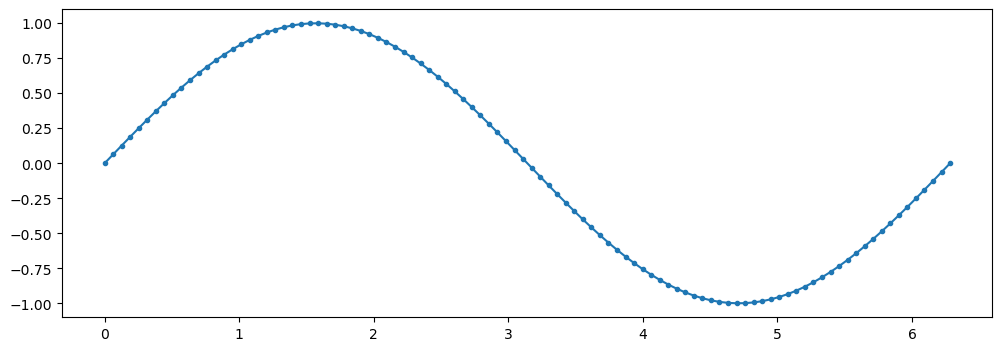

In [40]:
x = np.linspace(0, 2* np.pi, 100)
s = pd.Series(np.sin(x), index=x)
s.plot(marker='.')

## DataFrame

Un DataFrame est un tableau à deux dimensions. C'est l'équivalent d'une feuille de calcul Excel. Un DataFrame est un objet de la classe `pandas.DataFrame`.

- C'est un tableau bidimensionnel
- Il peut contenir des données de types différents
- Il a un index (étiquette) pour les lignes et les colonnes
- Il est mutable (modifiable)
- Il est optimisé pour la vitesse

Il est prévu pour faciliter l'import et l'export de données: 

- CSV
- Excel
- SQL
- HTML
- JSON
- HDF5

In [42]:
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Eve'],
    'age': [25, 30, 77],
    'city': ['Paris', 'Londre', 'Grèce']
})
df

,name,age,city
0,Alice,25,Paris
1,Bob,30,Londre
2,Eve,77,Grèce


### Méthodes très utiles

In [44]:
df.head(1)

,name,age,city
0,Alice,25,Paris


In [45]:
df.tail(1)

,name,age,city
2,Eve,77,Grèce


In [46]:
df.shape

(3, 3)

In [47]:
df.columns

Index(['name', 'age', 'city'], dtype='object')

In [49]:
df.dtypes

name    object
age      int64
city    object
dtype: object

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      int64 
 2   city    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [51]:
df.describe()

,age
count,3.000000
mean,44.000000
std,28.687977
min,25.000000
25%,27.500000
50%,30.000000
75%,53.500000
max,77.000000


In [52]:
type(df.name)

pandas.core.series.Series

### Modifications simples

In [57]:
df['initials'] = (
    df.name.str[0:2] + df.name.str[-1]
).str.lower()
df

,name,age,city,initials
0,Alice,25,Paris,ale
1,Bob,30,Londre,bob
2,Eve,77,Grèce,eve


In [ ]:
df.drop(columns=['initials']) # inplace=True

,name,age,city
0,Alice,25,Paris
1,Bob,30,Londre
2,Eve,77,Grèce


## Titanic

In [60]:
import seaborn as sns

In [61]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [62]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Groupes (groupby)

Une opération de *groupby* consiste à diviser un ensemble de données en groupes selon une ou plusieurs colonnes. Ensuite, on applique une fonction d'aggrégation sur chaque groupe. Par exemple, on peut calculer la moyenne, la somme, le maximum, le minimum, etc. sur chaque groupe.

Une opération de groupement résulte obligatoirement d'une opération d'aggrégation.

In [66]:
titanic.groupby(['sex', 'pclass']).mean(numeric_only=True)

survived        age     sibsp     parch        fare  \
sex    pclass                                                        
female 1       0.968085  34.611765  0.553191  0.457447  106.125798   
       2       0.921053  28.722973  0.486842  0.605263   21.970121   
       3       0.500000  21.750000  0.895833  0.798611   16.118810   
male   1       0.368852  41.281386  0.311475  0.278689   67.226127   
       2       0.157407  30.740707  0.342593  0.222222   19.741782   
       3       0.135447  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    pclass                        
female 1         0.000000  0.361702  
       2         0.000000  0.421053  
       3         0.000000  0.416667  
male   1         0.975410  0.614754  
       2         0.916667  0.666667  
       3         0.919308  0.760807

In [67]:
titanic.groupby(['sex', 'pclass']).agg({
    'age': 'mean', 'fare': 'sum'
})

age       fare
sex    pclass                      
female 1       34.611765  9975.8250
       2       28.722973  1669.7292
       3       21.750000  2321.1086
male   1       41.281386  8201.5875
       2       30.740707  2132.1125
       3       26.507589  4393.5865

### Pivot

In [68]:
titanic.pivot_table(
    values='fare', 
    index='pclass',
    columns='sex',
    aggfunc='mean'
)

sex,female,male
pclass,,
1,106.125798,67.226127
2,21.970121,19.741782
3,16.118810,12.661633


In [71]:
titanic.sex.to_frame()

,sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


### Empilement/Dépilement

In [72]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [77]:
grouped = titanic.groupby(
    ['embark_town', 'sex'])[['fare', 'age']].mean()
grouped

fare        age
embark_town sex                         
Cherbourg   female  75.169805  28.344262
            male    48.262109  32.998841
Queenstown  female  12.634958  24.291667
            male    13.838922  30.937500
Southampton female  38.740929  27.771505
            male    21.711996  30.291440

In [78]:
grouped.stack().to_frame()

0
embark_town sex                   
Cherbourg   female fare  75.169805
                   age   28.344262
            male   fare  48.262109
                   age   32.998841
Queenstown  female fare  12.634958
                   age   24.291667
            male   fare  13.838922
                   age   30.937500
Southampton female fare  38.740929
                   age   27.771505
            male   fare  21.711996
                   age   30.291440

In [80]:
grouped.unstack()

fare                   age           
sex             female       male     female       male
embark_town                                            
Cherbourg    75.169805  48.262109  28.344262  32.998841
Queenstown   12.634958  13.838922  24.291667  30.937500
Southampton  38.740929  21.711996  27.771505  30.291440

### Not a Number

In [83]:
titanic.isna().any(axis=0)

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [84]:
titanic.isna().any()[titanic.isna().any()].to_frame()

,0
age,True
embarked,True
deck,True
embark_town,True


In [85]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [87]:
u = titanic.isna().sum()[titanic.isna().sum() > 0]
u

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

### Affichage de graphiques

<AxesSubplot: >

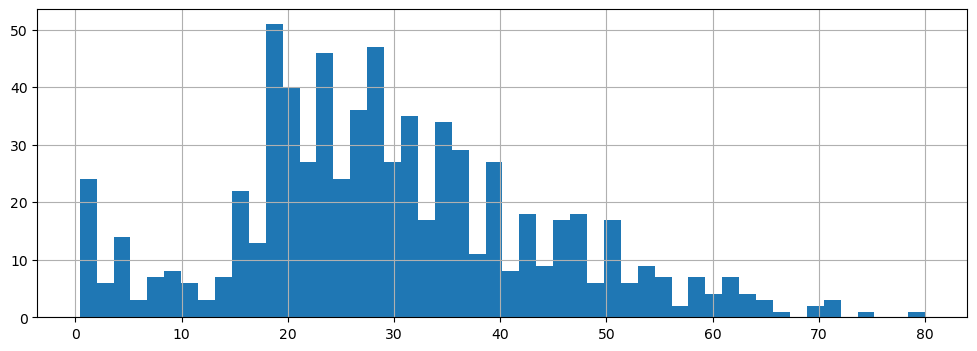

In [90]:
titanic.age.hist(bins=50)

<AxesSubplot: >

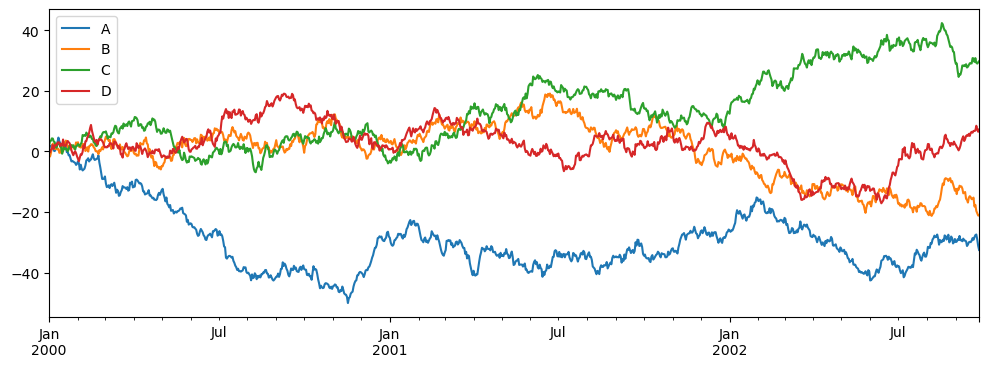

In [94]:
(pd 
 .DataFrame(
     np.random.randn(1000, 4),
     index=pd.date_range("1/1/2000", periods=1000),
     columns=list("ABCD")
 )
 .cumsum()
 .plot()
)


<AxesSubplot: title={'center': 'fare'}, xlabel='class'>

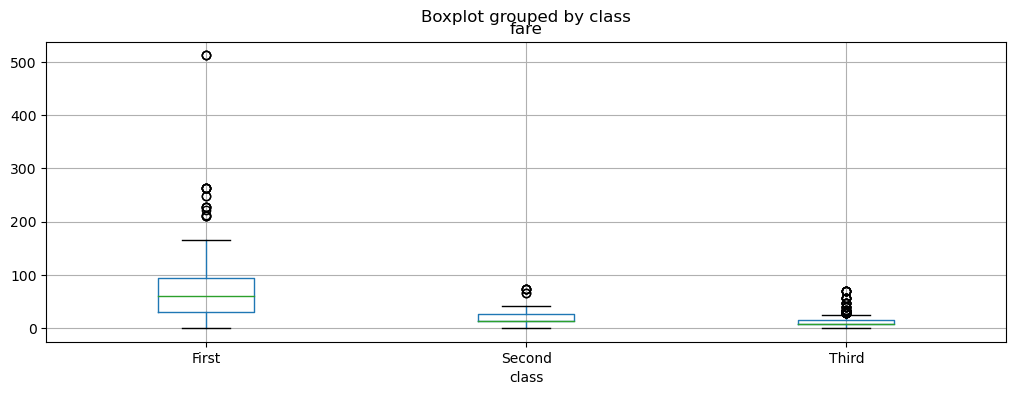

In [95]:
titanic.boxplot(column="fare", by="class")